# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy #https://github.com/wingchen/citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lons = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lon_range = (-180, 180)

# Create a set of random lat and lon combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) #np.random.uniform(lower bound, upper bound, number of values to be generated)
lons = np.random.uniform(lon_range[0], lon_range[1], size=1500)
lat_lons = zip(lats, lons)

# Identify nearest city for each lat, lon combination
for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 575


---

In [4]:
cities

['adamstown',
 'tolanaro',
 'crucecita',
 'oppdal',
 'muromtsevo',
 'grytviken',
 'college',
 'kodiak',
 'fale old settlement',
 'yarkovo',
 'invercargill',
 'puerto ayora',
 'margaret river',
 'tiksi',
 'west island',
 'rio verde de mato grosso',
 'bredasdorp',
 'heroica guaymas',
 'okha',
 'port elizabeth',
 'egilsstadir',
 'waitangi',
 'rikaze',
 'chiili',
 'whitehorse',
 'holmsund',
 'thompson',
 'port-aux-francais',
 'antonio enes',
 'lethbridge',
 'hamilton',
 'mount isa',
 'pemangkat',
 'georgetown',
 'tabou',
 'yanbu',
 'calvinia',
 'arraial do cabo',
 'nova sintra',
 'cidreira',
 'aligudarz',
 'sussex',
 'nemuro',
 'hawaiian paradise park',
 'kidal',
 'lebu',
 'ushuaia',
 'carbonear',
 'ribeira grande',
 'jamestown',
 'goure',
 'zuunmod',
 'papatowai',
 'puerto natales',
 'mogadishu',
 'namibe',
 'markovo',
 'changji',
 'tsiombe',
 'hobyo',
 'tazacorte',
 'avarua',
 'cargados carajos',
 'ust-nera',
 'bethel',
 'fisterra',
 'badger',
 'mejit',
 "kapa'a",
 'kulia village',
 'tof

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
city_data=[]
testurl = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&q=likiep"
test = requests.get(testurl).json()
pprint(test)


{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 9.8251, 'lon': 169.3107},
 'dt': 1687124915,
 'id': 2080115,
 'main': {'feels_like': 305.49,
          'grnd_level': 1011,
          'humidity': 79,
          'pressure': 1011,
          'sea_level': 1011,
          'temp': 301.31,
          'temp_max': 301.31,
          'temp_min': 301.31},
 'name': 'Likiep',
 'sys': {'country': 'MH', 'sunrise': 1687112582, 'sunset': 1687158289},
 'timezone': 43200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 75, 'gust': 7.76, 'speed': 7.01}}


In [6]:
test["dt"]

1687124915

In [7]:
try:
        # Parse the JSON and retrieve data
    city_weather = test

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
    city_lat = city_weather["coord"]["lat"]
    city_lon = city_weather["coord"]["lon"]
    city_max_temp = city_weather["main"]["temp_max"]
    city_humidity = city_weather["main"]["humidity"]
    city_clouds = city_weather["clouds"]["all"]
    city_wind = city_weather["wind"]["speed"]
    city_country = city_weather["sys"]["country"]
    city_date = city_weather["dt"]

        # Append the City information into city_data list
    city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "lon": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
except:
    print("City not found. Skipping...")
    pass

city_data

[{'City': 'adamstown',
  'Lat': 9.8251,
  'lon': 169.3107,
  'Max Temp': 301.31,
  'Humidity': 79,
  'Cloudiness': 100,
  'Wind Speed': 7.01,
  'Country': 'MH',
  'Date': 1687124915}]

In [14]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1 #first set starts with 1, doesn't satisfy if (i % 50 == 0 and i >= 50), so manually set it to 1 at first
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    # enumerate() iterates over any iteravble object (list, tuples, strings) and gives u both the index and the value as a tuple
    # iterrows() is from pandas library, iterates through dataframes and returns as a panda series object
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0 #reset the count of cities back to 0

    # Create endpoint URL with each city
    city_url = url + f"&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lon = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "lon": city_lon, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | tolanaro
Processing Record 3 of Set 1 | crucecita
Processing Record 4 of Set 1 | oppdal
Processing Record 5 of Set 1 | muromtsevo
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | college
Processing Record 8 of Set 1 | kodiak
Processing Record 9 of Set 1 | fale old settlement
Processing Record 10 of Set 1 | yarkovo
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | margaret river
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | west island
Processing Record 16 of Set 1 | rio verde de mato grosso
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | heroica guaymas
Processing Record 19 of Set 1 | okha
Processing Record 20 of Set 1 | port elizabeth
Processing Record 21 of Set 1 | egilsstadir
Processing Record 22 of Set 1 | wa

In [15]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          553
Lat           553
lon           553
Max Temp      553
Humidity      553
Cloudiness    553
Wind Speed    553
Country       553
Date          553
dtype: int64

In [16]:
# Display sample data
city_data_df.head()

,City,Lat,lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,296.22,78,79,7.74,PN,1687125036
1,tolanaro,-25.0319,46.9987,295.19,73,40,3.09,MG,1687125036
2,crucecita,-28.9500,-58.9833,286.48,64,0,3.18,AR,1687125036
3,oppdal,62.5943,9.6912,289.88,62,100,4.26,NO,1687125037
4,muromtsevo,56.3724,75.2418,284.51,40,98,4.81,RU,1687125037


In [17]:
# Export the City_Data into a csv
city_data_df.to_csv("Output Data/cities.csv", index_label="City_ID")

In [18]:
# Read saved data
city_data_df = pd.read_csv("Output Data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,296.22,78,79,7.74,PN,1687125036
1,tolanaro,-25.0319,46.9987,295.19,73,40,3.09,MG,1687125036
2,crucecita,-28.9500,-58.9833,286.48,64,0,3.18,AR,1687125036
3,oppdal,62.5943,9.6912,289.88,62,100,4.26,NO,1687125037
4,muromtsevo,56.3724,75.2418,284.51,40,98,4.81,RU,1687125037


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

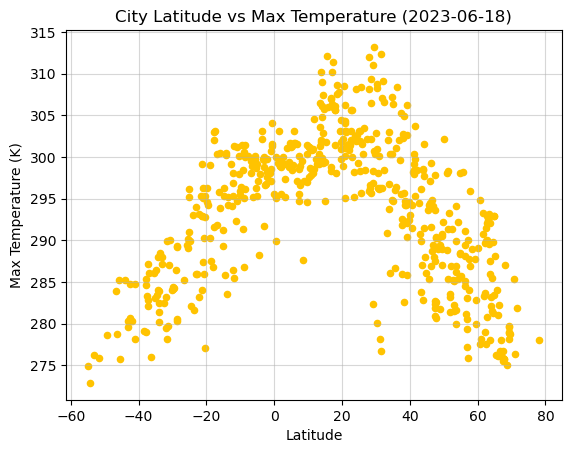

In [48]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", xlabel="Latitude", ylabel="Max Temperature (K)", 
                  title="City Latitude vs Max Temperature (2023-06-18)", color="#FFC300")

# Incorporate the other graph properties
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("Output Data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

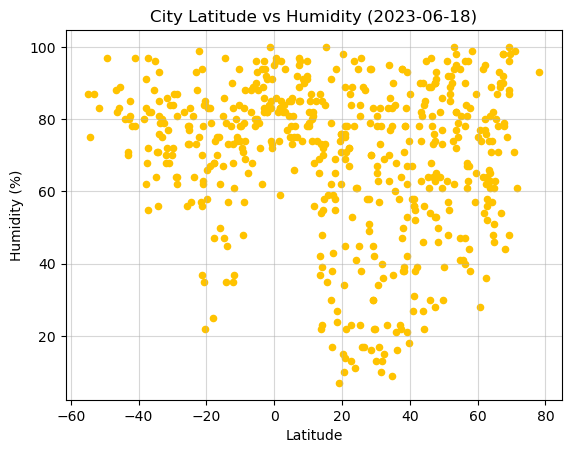

In [30]:
# Build scatter plot for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", xlabel="Latitude", ylabel="Humidity (%)", 
                  title="City Latitude vs Humidity (2023-06-18)", color="#FFC300")

# Incorporate the other graph properties
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("Output Data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

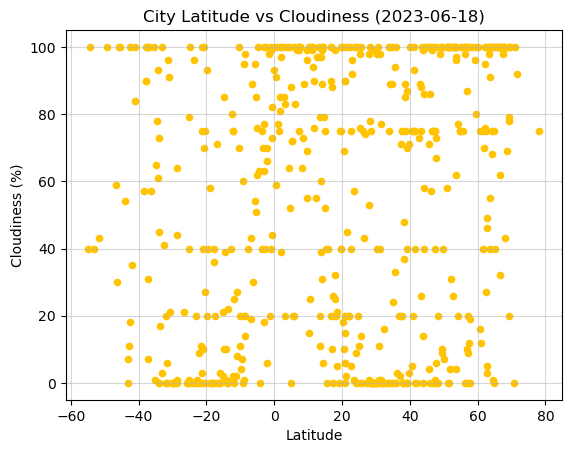

In [31]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", xlabel="Latitude", ylabel="Cloudiness (%)", 
                  title="City Latitude vs Cloudiness (2023-06-18)", color="#FFC300")

# Incorporate the other graph properties
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("Output Data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

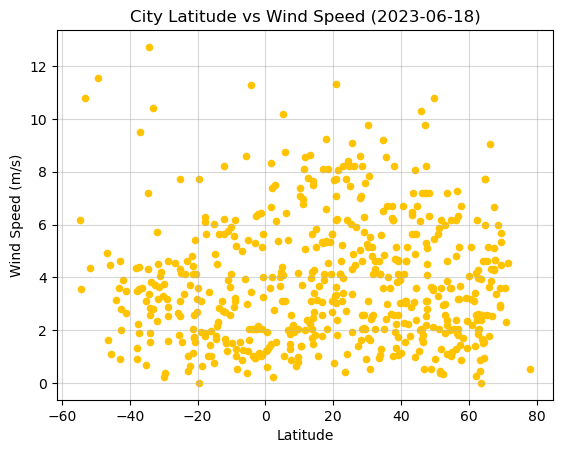

In [32]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", xlabel="Latitude", ylabel="Wind Speed (m/s)", 
                  title="City Latitude vs Wind Speed (2023-06-18)", color="#FFC300")

# Incorporate the other graph properties
plt.grid(alpha=0.5)

# Save the figure
plt.savefig("Output Data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [83]:
# Define a function to create Linear Regression plots
def plotlinregress(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y, color="#899878")
    plt.plot(x, regress_values, color="#222725")
    return line_eq
def rvalue(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    return f"r = {round(rvalue,4)}"

In [ ]:
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($100,000)')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.sample(10)

,City,Lat,lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
433,batangafo,7.3008,18.2833,295.56,97,100,1.47,CF,1687125229
62,bethel,41.3712,-73.4140,299.20,56,75,3.09,US,1687125006
273,bhag,29.0415,67.8239,311.10,30,0,2.08,PK,1687125189
499,dapa,9.7594,126.0531,300.40,78,55,0.98,PH,1687125245
544,griffith,41.5284,-87.4237,303.74,38,0,4.63,US,1687125257
347,shawinigan,46.5668,-72.7491,288.73,81,99,1.80,CA,1687125207
200,khandyga,62.6667,135.6000,292.88,58,5,1.86,RU,1687125170
466,pudozh,61.8099,36.5345,283.36,54,70,1.41,RU,1687125237
354,la palma,33.8464,-118.0467,302.96,70,100,4.12,US,1687125209


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.sample(10)

,City,Lat,lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
393,rio grande,-32.0350,-52.0986,283.21,68,0,2.33,BR,1687125021
202,padang,-0.9492,100.3543,297.18,85,99,2.04,ID,1687125171
381,saint-pierre,-21.3393,55.4781,292.97,56,100,4.12,RE,1687125111
308,barra do garcas,-15.8900,-52.2567,300.47,50,0,1.03,BR,1687125197
5,grytviken,-54.2811,-36.5092,272.90,75,100,3.57,GS,1687125057
201,madang,-5.2246,145.7966,298.65,90,85,1.20,PG,1687125170
96,kapiri mposhi,-13.9652,28.6809,283.63,45,0,2.32,ZM,1687125146
135,santa luzia,-19.7697,-43.8514,294.65,58,20,3.60,BR,1687125155
263,greymouth,-42.4667,171.2000,284.78,81,100,2.79,NZ,1687125186


###  Temperature vs. Latitude Linear Regression Plot

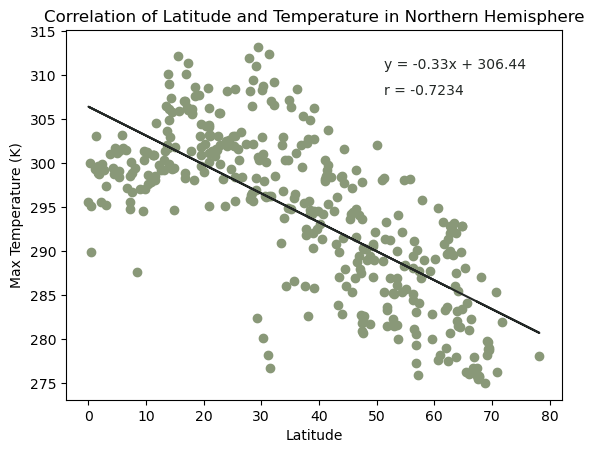

In [120]:
# Linear regression on Northern Hemisphere
plot = plotlinregress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.annotate(plot, xy=(50,310), xytext=(5,5), textcoords='offset points',color="#222725")
plt.annotate(rvalue(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"]), xy=(50,307), xytext=(5,5), textcoords='offset points',color="#222725")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.title("Correlation of Latitude and Temperature in Northern Hemisphere")
plt.show()

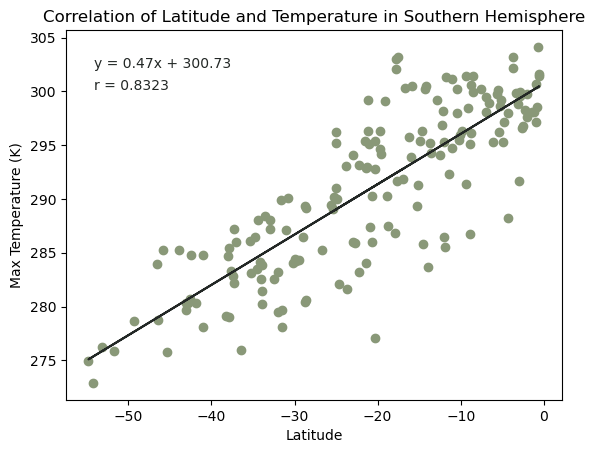

In [128]:
# Linear regression on Southern Hemisphere
plot = plotlinregress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.annotate(plot, xy=(-55,301.5), xytext=(5,5), textcoords='offset points',color="#222725")
plt.annotate(rvalue(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"]), xy=(-55,299.5), xytext=(5,5), textcoords='offset points',color="#222725")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (K)')
plt.title("Correlation of Latitude and Temperature in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** 

For both northern and southern hemipheres, the latitude of a city has a strong correlation with its max temperature, as seen in their r-values (northern |r|=0.7234, southern |r|=0.8323). The higher the latitude gets, the lower the max temperature is for both hemispheres.

### Humidity vs. Latitude Linear Regression Plot

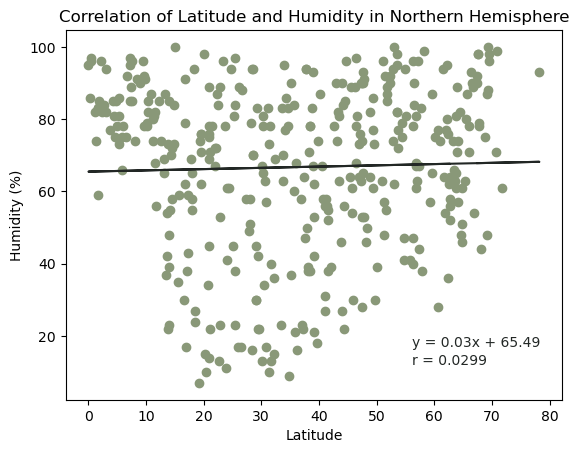

In [126]:
# Northern Hemisphere
plot = plotlinregress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.annotate(plot, xy=(55,15), xytext=(5,5), textcoords='offset points',color="#222725")
plt.annotate(rvalue(northern_hemi_df["Lat"], northern_hemi_df["Humidity"]), xy=(55,10), xytext=(5,5), textcoords='offset points',color="#222725")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Correlation of Latitude and Humidity in Northern Hemisphere")
plt.show()

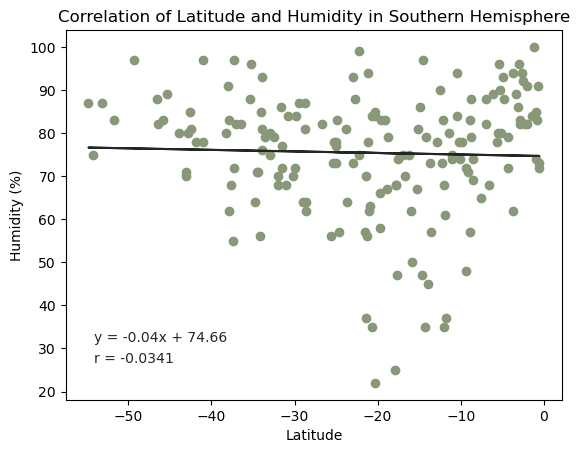

In [131]:
# Southern Hemisphere
plot = plotlinregress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.annotate(plot, xy=(-55,30), xytext=(5,5), textcoords='offset points',color="#222725")
plt.annotate(rvalue(southern_hemi_df["Lat"], southern_hemi_df["Humidity"]), xy=(-55,25), xytext=(5,5), textcoords='offset points',color="#222725")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("Correlation of Latitude and Humidity in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** 

For both northern and southern hemipheres, the latitude of a city has no correlation with its humidity, as seen in their r-values (northern |r|=0.0299, southern |r|=0.0341). 

### Cloudiness vs. Latitude Linear Regression Plot

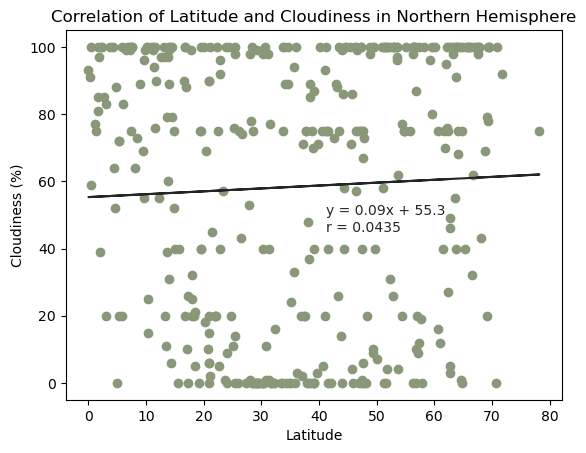

In [123]:
# Northern Hemisphere
plot = plotlinregress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.annotate(plot, xy=(40,48), xytext=(5,5), textcoords='offset points',color="#222725")
plt.annotate(rvalue(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"]), xy=(40,43), xytext=(5,5), textcoords='offset points',color="#222725")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Correlation of Latitude and Cloudiness in Northern Hemisphere")
plt.show()

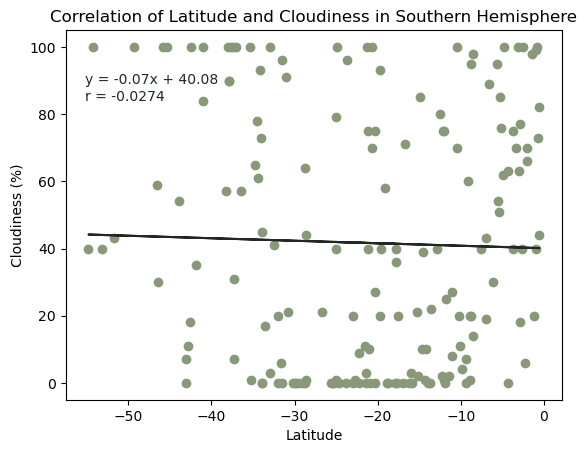

In [130]:
# Southern Hemisphere
plot = plotlinregress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.annotate(plot, xy=(-56,87), xytext=(5,5), textcoords='offset points',color="#222725")
plt.annotate(rvalue(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"]), xy=(-56,82), xytext=(5,5), textcoords='offset points',color="#222725")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("Correlation of Latitude and Cloudiness in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** 

For both northern and southern hemipheres, the latitude of a city has no correlation with its cloudiness, as seen in their r-values (northern |r|=0.0435, southern |r|=0.0274). 

### Wind Speed vs. Latitude Linear Regression Plot

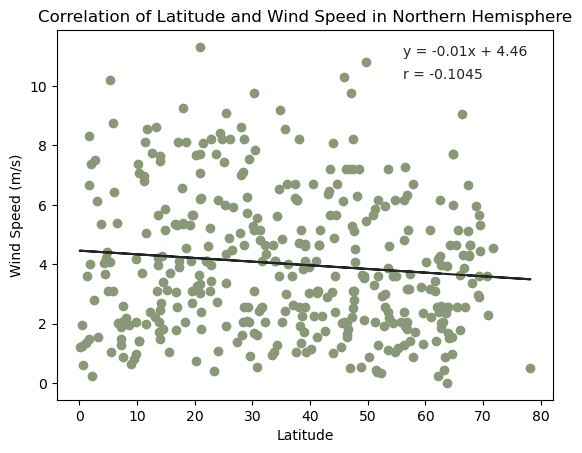

In [137]:
# Northern Hemisphere
plot = plotlinregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.annotate(plot, xy=(55,10.8), xytext=(5,5), textcoords='offset points',color="#222725")
plt.annotate(rvalue(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"]), xy=(55,10), xytext=(5,5), textcoords='offset points',color="#222725")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("Correlation of Latitude and Wind Speed in Northern Hemisphere")
plt.show()

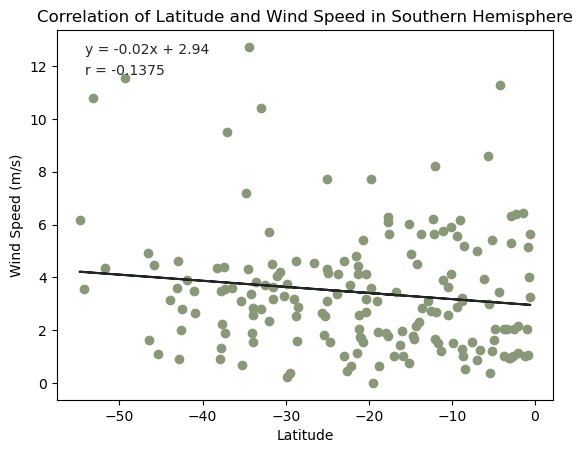

In [142]:
# Southern Hemisphere
plot = plotlinregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.annotate(plot, xy=(-55,12.2), xytext=(5,5), textcoords='offset points',color="#222725")
plt.annotate(rvalue(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"]), xy=(-55,11.4), xytext=(5,5), textcoords='offset points',color="#222725")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title("Correlation of Latitude and Wind Speed in Southern Hemisphere")
plt.show()

**Discussion about the linear relationship:** 

For both northern and southern hemipheres, the latitude of a city has no correlation with its humidity, as seen in their r-values (northern |r|=0.1045, southern |r|=0.1375). 